# SNLP 2021 Final Project

Name 1: Lukas Wilde<br/> 
Student id 1: 2564597<br/>
Email 1: s8luwild@stud.uni-saarland.de<br/>


Name 2: Dennis Heß<br/>
Student id 2: 2574005<br/>
Email 2: s8dehess@stud.uni-saarland.de<br/> 

In [68]:
import sentencepiece as spm
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import os
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [88]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/lukas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/lukas/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Exercise 1 - Preprocessing

In [105]:
#########################################################
# NEEDS TO BE THE ROOT FOLDER OF THE PROJECT - PLS CHANGE
#########################################################

%cd ~/dev/snlp_project

/home/lukas/dev/snlp_project


In [112]:
random.seed(42)

PATH = "./data"

tokenizer = RegexpTokenizer(r"\w+")

for name in ['alice_in_wonderland.txt', 'bengali_corpus.txt']:
    file = os.path.join(PATH, name)
    with open(file, 'r') as f:
        
        # lowercase input
        x = f.read().lower().replace("'", "")
        
        total_symbols = len(x)
        
        # tokenize sentences
        sentences = sent_tokenize(x)
        
        # remove additional whitespaces
        sentences = list(map(lambda x: " ".join(x.split()), sentences))
        
        # remove punctuation (only in english corpus, in bengali words are strangely split up by this)
        if name == 'alice_in_wonderland.txt':
            temp = []
            for sent in sentences:
                words = word_tokenize(sent)
                modified_words = tokenizer.tokenize(' '.join(words))
                temp.append(' '.join(modified_words))

            sentences = temp
        
        # remove stopwords
        temp = []
        for sent in sentences:
            temp.append([])
            for word in sent.split():
                if word not in (stopwords.words('english')):
                    temp[-1].append(word)
        
        sentences = list(map(lambda x: " ".join(x), temp))
        
        num_sentences = len(sentences)
        train_set = sentences
        
        # shuffle sentences
        random.shuffle(train_set)
        
        test_set = []
        test_symbols = 0
        
        # remove sentences from train set, until there are only 80 % of symbols in this set, the rest in test set
        while test_symbols < 0.2 * total_symbols:
            idx = random.randint(0, len(train_set)-1)
            test_sentence = train_set.pop(idx)
            test_symbols += len(test_sentence)
            test_set.append(test_sentence)
                
        print("train-test-split: %f %f" % (1 - test_symbols/total_symbols, test_symbols/total_symbols))
        
        # write contents to file
        for output in ['train.txt', 'test.txt']:
            output_file = os.path.join(PATH, ("en_" if name == 'alice_in_wonderland.txt' else 'bn_') + output)
            with open(output_file, 'w') as out:
                out.write("\n".join(train_set) if output == 'train.txt' else "\n".join(test_set))

train-test-split: 0.799948 0.200052
train-test-split: 0.799757 0.200243


## Excerpt from the preprocessed data that is fed to sentencepiece:
```
said alice
everything way think likely talk rate theres harm trying
like cats
said alice tone great surprise
time alice waited patiently chose speak
pepper mostly said cook
said pig replied alice wish wouldnt keep appearing vanishing suddenly make one quite giddy
verses white rabbit read told mentioned gave good character said could swim
course dont
queen hear
let lesson never lose temper
know im mad
another minute whole head appeared alice put flamingo began account game feeling glad someone listen
```

```
আবুল!!
সালামটাও দিলি না শুদ্ধ করে তারপর এমন স্টাইলের কথা বাংলা না ইংরেজি বলছিস্ বুঝতে কষ্ট হয়েছে ।তাছাড়া কি দোষে ফাঁসি দেওয়া হয়েছে তাও তুমি জানো না?
ক্রিকেট বোর্ড চালাতে হবে ক্রিকেট জগতের লোক দিয়েরাজনীতিবিদ দিয়ে না। পরিশেষেনাজমুল ইসলাম পাপন সাহেব এদেশের ক্রিকেটে কিছু দিতে পারেন নি।ক্রিকেটের উন্নয়নে তার কোনো অবদান নেই।আজ বাংলাদেশের ক্রিকেট যে অবস্থানে পৌছেছেসেটা সাকিব তামিমদের হাত ধরে পৌছেছে।সাকিবের মতো প্লেয়ার বাংলাদেশে অতীতে কেউ আসে নি ভবিষ্যতে আরও বছরে কেউ আসবে কিনা সেটাও সন্দেহ।বাংলাদেশের একমাত্র আন্তর্জাতিক মানের প্লেয়ার সাকিব আল হাসান।যে পৃথিবীর সকল টিমে জাতীয় দলে খেলার যোগ্যতা রাখে।তাই তাকে নিয়ে আর রাজনীতি না করে তাকে মাঠে ফেরানোর ব্যবস্থা করুন।সাকিব ছাড়া বাংলাদেশ ক্রিকেট কল্পনাও করা যায় নাতবে ব্যক্তিস্বার্থ চিন্তা করলে সাকিব চাইলে অন্য যে কোনো
```

# Exercise 2 - Generate SentencePiece encodings

In [106]:
with open('data/en_train.txt', 'r') as f:
    text = f.read().replace('\n', ' ')
    
with open('data/en_test.txt', 'r') as f:
    test = f.read().replace('\n', ' ')

In [10]:
# English on character level

spm.SentencePieceTrainer.Train(f'--input=data/en_train.txt --model_prefix=en_chars --vocab_size=33 --character_coverage=1.0 --model_type=bpe')

sp = spm.SentencePieceProcessor()
sp.load('en_chars.model')

encoded_train = sp.EncodeAsPieces(text)
encoded_test = sp.EncodeAsPieces(test)

with open('en_s1.txt', 'w') as f:
    f.write(' '.join(encoded_train))
    
with open('en_test1.txt', 'w') as f:
    f.write(' '.join(encoded_test))

## Excerpt from the corresponding file

```
▁ s a i d ▁ a l i c e ▁ e v e r y t h i n g ▁ w a y ▁ t h i n k ▁ l i k e l y ▁ t a l k ▁ r a t e ▁ t h e r e s ▁ h a r m ▁ t r y i n g ▁ l i k e ▁ c a t s ▁ s a i d ▁ a l i c e ▁ t o n e ▁ g r e a t ▁ s u r p r i s e ▁ t i m e ▁ a l i c e ▁ w a i t e d ▁ p a t i e n t l y ▁ c h o s e ▁ s p e a k ▁ p e p p e r ▁ m o s t l y ▁ s a i d ▁ c o o k ▁ s a i d ▁ p i g ▁ r e p l i e d ▁ a l i c e ▁ w i s h ▁ w o u l d n t ▁ k e e p
```

In [11]:
# English on smaller sub units

spm.SentencePieceTrainer.Train(f'--input=data/en_train.txt --model_prefix=en_smaller --vocab_size=250 --character_coverage=1.0 --model_type=bpe')

sp = spm.SentencePieceProcessor()
sp.load('en_smaller.model')

encoded_train = sp.EncodeAsPieces(text)
encoded_test = sp.EncodeAsPieces(test)

with open(f'en_s2.txt', 'w') as f:
    f.write(' '.join(encoded_train))

with open(f'en_test2.txt', 'w') as f:
    f.write(' '.join(encoded_test))

## Excerpt from the corresponding file

```
▁said ▁alice ▁ever ything ▁w ay ▁think ▁like ly ▁t al k ▁r at e ▁th er es ▁h ar m ▁tr y ing ▁like ▁cat s ▁said ▁alice ▁t one ▁gr eat ▁s ur p ri se ▁time ▁alice ▁w a it ed ▁p at i ent ly ▁ch o se ▁sp ea k ▁p e pp er ▁m o st ly ▁said ▁c ook ▁said ▁pi g ▁rep li ed ▁alice ▁w ish ▁would nt ▁k ee p ▁a pp ear ing ▁v an is hing ▁su d d en ly ▁ma ke ▁one ▁quite ▁g id d y ▁ ver s es ▁wh ite ▁rabbit ▁r ead ▁t o ld ▁m ent ion ed ▁g a ve ▁g oo d ▁ch ar a c ter ▁said ▁could ▁s w im ▁c our se ▁d ont ▁queen ▁hear ▁l et ▁l ess on ▁never ▁l o se ▁t em p er ▁know ▁im ▁ma d ▁st r et ch ed ▁t i p t o e ▁p ee p ed
```

In [12]:
# English on larger sub units

spm.SentencePieceTrainer.Train(f'--input=data/en_train.txt --model_prefix=en_larger --vocab_size=1500 --character_coverage=1.0 --model_type=bpe')

sp = spm.SentencePieceProcessor()
sp.load('en_larger.model')

encoded_train = sp.EncodeAsPieces(text)
encoded_test = sp.EncodeAsPieces(test)

with open(f'en_s3.txt', 'w') as f:
    f.write(' '.join(encoded_train))

with open(f'en_test3.txt', 'w') as f:
    f.write(' '.join(encoded_test))

## Excerpt from the corresponding file

```
▁said ▁alice ▁everything ▁way ▁think ▁likely ▁talk ▁rate ▁theres ▁h arm ▁trying ▁like ▁cats ▁said ▁alice ▁tone ▁great ▁surpri se ▁time ▁alice ▁waited ▁pat iently ▁ch ose ▁speak ▁pepper ▁mo st ly ▁said ▁cook ▁said ▁pig ▁replied ▁alice ▁wish ▁wouldnt ▁keep ▁appear ing ▁van is hing ▁suddenly ▁make ▁one ▁quite ▁g idd y ▁ vers es ▁white ▁rabbit ▁read ▁told ▁ment ioned ▁gave ▁good ▁ch ar ac ter ▁said ▁could ▁swim ▁course ▁dont ▁queen ▁hear ▁let ▁less on ▁never ▁l ose ▁temp er ▁know ▁im ▁mad ▁str etched ▁ti pt o e ▁p eeped ▁edge ▁mushroom ▁eyes ▁imm edi ately ▁m et ▁large ▁caterpillar
```

In [13]:
with open('data/bn_train.txt', 'r') as f:
    text = f.read().replace('\n', ' ')
    
with open('data/bn_test.txt', 'r') as f:
    test = f.read().replace('\n', ' ')

In [14]:
# Bengali on character level

spm.SentencePieceTrainer.Train(f'--input=data/bn_train.txt --model_prefix=bn_chars --vocab_size=71 --character_coverage=0.995 --model_type=bpe')

sp = spm.SentencePieceProcessor()
sp.load('bn_chars.model')

encoded_train = sp.EncodeAsPieces(text)
encoded_test = sp.EncodeAsPieces(test)

with open('bn_s1.txt', 'w') as f:
    f.write(' '.join(encoded_train))
    
with open('bn_test1.txt', 'w') as f:
    f.write(' '.join(encoded_test))

## Excerpt from the corresponding file

```
▁ আ ব ু ল ! ! ▁ স া ল া ম ট া ও ▁ দ ি ল ি ▁ ন া ▁ শ ু দ ্ ধ ▁ ক র ে ▁ ত া র প র ▁ এ ম ন ▁ স ্ ট া ই ল ে র ▁ ক থ া ▁ ব া ং ল া ▁ ন া ▁ ই ং র ে জ ি ▁ ব ল ছ ি স ্ ▁ ব ু ঝ ত ে ▁ ক ষ ্ ট ▁ হ য ় ে ছ ে ▁ । ত া ছ া ড ় া ▁ ক ি ▁ দ ো ষ ে ▁ ফ া ঁ স ি ▁ দ ে ও য ় া ▁ হ য ় ে ছ ে ▁ ত া ও ▁ ত ু ম ি ▁ জ া ন ো ▁ ন া ? ▁ ক ্ র ি ক ে 
```

In [15]:
# Bengali on smaller sub units

spm.SentencePieceTrainer.Train(f'--input=data/bn_train.txt --model_prefix=bn_smaller --vocab_size=250 --character_coverage=0.995 --model_type=bpe')

sp = spm.SentencePieceProcessor()
sp.load('bn_smaller.model')

encoded_train = sp.EncodeAsPieces(text)
encoded_test = sp.EncodeAsPieces(test)

with open(f'bn_s2.txt', 'w') as f:
    f.write(' '.join(encoded_train))

with open(f'bn_test2.txt', 'w') as f:
    f.write(' '.join(encoded_test))

## Excerpt from the corresponding file

```
▁আ ব ুল ! ! ▁সা লাম টা ও ▁দি লি ▁না ▁শ ুদ ্ ধ ▁করে ▁তার প র ▁এ ম ন ▁স ্ট াই ল ের ▁কথা ▁বা ংলা ▁না ▁ই ং রে জ ি ▁বল ছি স ্ ▁ব ু ঝ তে ▁ক ষ ্ট ▁হয়ে ছে ▁ । তা ছ া ড় া ▁কি ▁দ ো ষ ে ▁ফ া ঁ সি ▁দে ওয়া ▁হয়ে ছে ▁তা ও ▁ত ু মি ▁জান ো ▁না ? ▁ক ্র ি কে ট ▁ব ো র্ ড ▁চ ালা তে ▁হবে ▁ক ্র ি কে ট ▁জ গ ত ের ▁ লো ক ▁দি য় ের া জ ন ী তি বি দ ▁দি য়ে ▁না । ▁পর 

In [16]:
# Bengali on larger sub units

spm.SentencePieceTrainer.Train(f'--input=data/bn_train.txt --model_prefix=bn_larger --vocab_size=1500 --character_coverage=0.995 --model_type=bpe')

sp = spm.SentencePieceProcessor()
sp.load('bn_larger.model')

encoded_train = sp.EncodeAsPieces(text)
encoded_test = sp.EncodeAsPieces(test)

with open('bn_s3.txt', 'w') as f:
    f.write(' '.join(encoded_train))
    
with open('bn_test3.txt', 'w') as f:
    f.write(' '.join(encoded_test))

## Excerpt from the corresponding file

```
▁আ ব ুল !! ▁সা লাম টা ও ▁দি লি ▁না ▁শ ুদ্ধ ▁করে ▁তারপর ▁এমন ▁স্ট াই লের ▁কথা ▁বাংলা ▁না ▁ই ং রে জি ▁বলছি স্ ▁বুঝতে ▁কষ্ট ▁হয়েছে ▁। তা ছা ড়া ▁কি ▁দোষ ে ▁ফাঁসি ▁দেওয়া ▁হয়েছে ▁তাও ▁তুমি ▁জানো ▁না ? ▁ক্রিকেট ▁বো র্ ড ▁চ ালা তে ▁হবে ▁ক্রিকেট ▁জ গ তের ▁লোক ▁দি য়েরা জন ী তি বি দ ▁দিয়ে ▁না । ▁পরি শেষ ে না জ ম ুল ▁ইসলাম ▁পাপন ▁সাহেব ▁এ দেশ ের ▁ক্রিকেট ে ▁কিছু ▁দিতে ▁পারেন ▁নি । ক ্রিকেট ের ▁উ ন্ন য় নে ▁তার ▁কোনো ▁অব দ ান ▁নেই । আজ ▁বাংলাদেশের ▁ক্রিকেট ▁যে ▁অব স্থ ানে ▁প ৌ ছে ছে সে টা ▁সাকিব ▁তা মি ম দের ▁হাত ▁ধরে ▁প ৌ ছে ছে । সাকিব ের ▁মতো ▁প্লেয়ার ▁বাংলাদেশে ▁অ তী তে ▁কেউ ▁আসে ▁নি ▁ভ বি ষ ্য তে ▁আর ও ▁বছ রে ▁কেউ ▁আসবে ▁কি না ▁সেটা ও
```

# Exercise 3 - Train and tune RNNLM models




In [154]:
%cd models

/home/lukas/dev/snlp_project/models


In [19]:
# uncomment the line of the model you want to train

#train_file, test_file = '../en_s1.txt', '../en_test1.txt'
#train_file, test_file = '../en_s2.txt', '../en_test2.txt'
#train_file, test_file = '../en_s3.txt', '../en_test3.txt'
#train_file, test_file = '../bn_s1.txt', '../bn_test1.txt'
#train_file, test_file = '../bn_s2.txt', '../bn_test2.txt'
train_file, test_file = '../bn_s3.txt', '../bn_test3.txt'

vocab, hidden, bptt, _class = 243, 100, 6, 243

command = f"""../rnnlm/rnnlm \
-train {train_file} \
-valid {test_file} \
-rnnlm model_{vocab}_{hidden}_{bptt}_{_class} \
-hidden {hidden} \
-rand-seed 1 \
-debug 2 \
-bptt {bptt} \
-class {_class}"""

with open('rnnlm.sh', 'w') as f:
    f.write(command)
    
!bash rnnlm.sh

debug mode: 2
train file: ../en_s2.txt
valid file: ../en_test2.txt
class size: 243
Hidden layer size: 100
BPTT: 6
Rand seed: 1
rnnlm file: model_243_100_6_243
Starting training using file ../en_s2.txt
Vocab size: 243
Words in train file: 22006
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 7.4193    Words/sec: 33527.9   VALID entropy: 7.2899
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 6.9942    Words/sec: 32818.9   VALID entropy: 6.6187
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 6.3266    Words/sec: 32902.9   VALID entropy: 6.0308
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 5.8210    Words/sec: 33116.5   VALID entropy: 5.6432
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 5.4607    Words/sec: 33185.9   VALID entropy: 5.3985
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 5.1998    Words/sec: 33254.4   VALID entropy: 5.2379
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 4.9980    Words/sec: 33164.4   VALID entropy: 5.1314
Iter:   7	Alpha: 0.100000	   TRAIN entropy: 4.8332    Words/sec: 33191.7   VA

# Exercise 4 - Generate tokens from RNNLM models

In [172]:
# uncomment the line of the model you want to generate tokens for

# baseline models

#model_name = 'en_s1/model_33_40_3_33'
#model_name = 'en_s2/model_250_40_3_243'
#model_name = 'en_s3/model_1349_40_3_1349'
#model_name = 'bn_s1/model_544_40_3_544'
#model_name = 'bn_s2/model_723_40_3_723'
#model_name = 'bn_s3/model_1972_40_3_1972'

# best models

model_name = 'en_s1/model_33_150_7_1'
#model_name = 'en_s2/model_250_100_6_243'
#model_name = 'en_s3/model_1349_2_10_1'
#model_name = 'bn_s1/model_544_100_10_1'
#model_name = 'bn_s2/model_723_300_10_1'
#model_name = 'bn_s3/model_1972_300_10_1'

folder = model_name[:5] + '_textgen'

# the path below needs to be changed to {folder}/baseline/{10**i}.txt for the baseline models
for i in range(1, 8):
    command = f"""../rnnlm/rnnlm \
    -rnnlm {model_name} \
    -gen {10**i} \
    -debug 2 \
    > {folder}/{10**i}.txt;
    """

    with open('generate.sh', 'w') as f:
        f.write(command)

    !bash generate.sh
    
    # decode the generated files
    with open(f"{folder}/{10**i}.txt", 'r') as f:
        encoded = " ".join(f.readlines()[3:])
    
    mapping = {
        's1': 'chars',
        's2': 'smaller',
        's3': 'larger'
    }
    
    model = model_name[:2] + '_' + mapping[model_name[3:5]] + '.model'
    
    sp = spm.SentencePieceProcessor()
    sp.load('../' + model)
    
    decoded = sp.DecodePieces(word_tokenize(encoded))
    
    # write decoded file to same folder
    with open(f"{folder}/{10**i}_decoded.txt", 'w') as f:
        f.write(decoded)

### In the following, we will include an excerpt from the generated tokens for each subword level we chose:

#### English character level:
```
queen starrupay ously march holephen appears gudenn overything therink never well new rathle hand say could come gace hall could choubued sit leave youling thought sippereften howevered sure box gring near perfactun opened bottle never tancy kent wouldnt queen three sing went alay shall dear firsking words every haltmentail said jare
```
#### English small subword level:
```
they beack tal minate fance sood take wistance gioboured would much large one something saidful prizidly little could jumped bused shandiast sneeged court said youre found yetter ready wain dunk say well mcee go people question jury mouse day taby minut pinessed shoulder till tryesnt said hatter said dunting tir grin got plates oreer
```
#### English large subword level:
```
ly dont please mock alice ant begun dodo beganmen ringpying nenwrhed dreaming box make bill keep said alice felt put pocket dont filled yet eated change hatter round dally however tea gryphon dving else hatter watchs pen piser executs beauti n tried added stom voice falles thought alice came three jumped followedfully important jury shook soup foot back half oh fellow indsily trees shall spramer pardon remember would ill near colited thought queen
```
#### Bengali character level:
```
মানুষ খাইয়ে দিয়া নিয়ে গোটা বোবা বেষী বলছেন নয়ন ধরকার কি লাগুন কানুন তোমা মিজানুর পনে দরকার।মিন্নি থেকে খেলাইতে পারছে গান নাই।এই ভালো লোকমে পারবান হয় সরকার খোগন পেমায়গা চরেছেন দেওয়া হয়ে আল্লাহ তাহলে নামার সেই দেশে,,এই ছাসে আজ বাদ করুন।দৌয়েকি এখাও ভাই আগুনের ভক্তরা ছাড়ে ফেটি সরতো আর খারাপ বল এরহম চায় নিজাহেশে পাওরান সুন্দরশোধ আর একটা পারলে করিযদার তবার কুকুর। তার এর ,ভুল দেওয়া দরকার জোনাই,বাংলা বিবাল প্রছিস কিভাবে প্রতি কালে ঘারে অরুভোট বাইয়ে ফাসি বে কুল্লার করে লম্বার সারা যদি একটা লুগী দিনাকালোও করার মতি কৱ নয় কেও ফুলায়ে যে কিন্তু করিন কে নিরি? মূর্ট আর তো বিশ্বাজের ধরতি ক্ষন্ডা এই
```
#### Bengali small subword level:
```
তাতে দেখানো হ তাকএর হাত থেকে বুল হতসে নাম্মত জন্মপুলিশের সন্ত্রাসী আনলাইক আর জানতো তাহলে ওছে তার কড়ি। শুধুক্ষিত জানে না কেন লুচ্চা সব বিচার পরে নিয়া।।এই কুত্তার বাচ্চারে গুলি করে হাসার জ্বলে বমি ওর মুখ দেখলে তার উদকতাম করতেছে কিন্তু ব্যস্ত অমানুষ ৷তোমারে ধন্যবাদ হ্যাডা কে সানাইয় ভিডি করবে love শালারা অভিনেতা অাওত আছে জানিনি কি গালি দিলে পাপন ক্রিনন্ধার সময় অফিসে আমি ওর জনগ্রাম<br />f=''hঅপরাধ করছে।যখন কোটি টাকা দিয়ে দুষ্টিমি এতে জোর হবে পর ৷ধন্যবাদ কুকুরের বাচ্চারপাপকে জুতা দিয়ে মারব। তারও একধু ফাঁসি চাই মাগি রাকি ছাগলনার অনুষরে জাই সবাই ভন্ড দেশে অনুরোধ করছিসবাইচ্চা চামলাপিক- মানুষকে হতগায়ে লালতে হবে।
```
#### Bengali large subword level:
```
আমি মনে হয় এডমিন। সরিফাজান্দে আলো ডিসি? হাজার হাজার দালালি না দ বাবারিত ব্লাউ বিদিনএই মেয়ের নির্লজ্জ নাকথা পোর করব আমি।এই চার নাস্তিক রাজিরহে ভন্ড।আইল হামাশআল্লাহহজালাল৷ এটা সুঁশ। এই খানকি মাগি রেখেঅবসের গর্গ রাখা হচ্ছে।।।এই করেছি আর কুত্তার বাচ্চা পর টা ঠিকয়েছিসআমিন হড়া নাটককের গোলা ও আজীবন অন্তর্বল ব্যবস্থা দিয়া পাকআপনাদের হাসি বিক্কা! না নিয়ে মজা পাইলাম। ডিসি মিন্নি হেডা পাদ আসই সাথেই ওদের কে ভাবতো।বাংলাদেশরে নিজেরা জারজ। শালার পুতেরা ধু ডাকাইঢুকাবোচান আস আরো অনেক ছুবে শালা করছরে চরে সালা ডিজিটা যাবোকালে কিও মনে করিছকুত্তার বাচ্চা কেমনেখানকির পোলারা বহি ছেলে করি রিস্যার একটা খারাপ কুতা আমি
```

# Exercise 5 - Analyse OOV-rates

In [149]:
%cd ..

/home/lukas/dev/snlp_project


In [101]:
def compute_oov_rate(train, test):
    """
    params: train, test: strings of train set and test set
    returns: OOV-rate of test set against the train set
    """
    train_words = set(word_tokenize(train))
    test_words = word_tokenize(test)
    
    total_words = len(test_words)
    oov_words = 0

    for word in test_words:
        if word not in train_words:
            oov_words += 1
            
    return oov_words/total_words

In [56]:
# compute OOV-rate without augmenting the train set

with open('data/en_train.txt', 'r') as f:
    train_en = f.read()

with open('data/en_test.txt', 'r') as f:
    test_en = f.read()

print(f'English OOV-rate: {compute_oov_rate(train_en, test_en)}')

with open('data/bn_train.txt', 'r') as f:
    train_bn = f.read()
    
with open('data/bn_test.txt', 'r') as f:
    test_bn = f.read()
    
print(f'Bengali OOV-rate: {compute_oov_rate(train_bn, test_bn)}')

English OOV-rate: 0.1213073538654934
Bengali OOV-rate: 0.1618049225159526


In [111]:
def plot_oov_rate(model_file, folder_prefix):
    """
    params: model_file: one of [en, bn]_[chars, smaller, larger].model
            folder_prefix: one of [en, bn]_[s1, s2, s3] corresponding to the model_file
    returns: plot of OOV rate when augmenting the train set
    """
    sp = spm.SentencePieceProcessor()
    sp.load(model_file)

    oov_rates = []
    baseline_oov_rates = []

    for i in range(1, 8):

        with open(f'models/{folder_prefix}_textgen/{10**i}.txt') as f:
            generated = " ".join(f.readlines()[3:])
            
        with open(f'models/{folder_prefix}_textgen/baseline/{10**i}.txt') as f:
            baseline_generated = " ".join(f.readlines()[3:])

        augment = sp.DecodePieces(word_tokenize(generated))
        augment_baseline = sp.DecodePieces(word_tokenize(baseline_generated))

        oov_rates.append(compute_oov_rate(augment + ' ' + (train_en if model_file[:2] == 'en' else train_bn), \
            test_en if model_file[:2] == 'en' else test_bn))
        
        baseline_oov_rates.append(compute_oov_rate(augment_baseline + ' ' + (train_en if model_file[:2] == 'en' else train_bn), \
            test_en if model_file[:2] == 'en' else test_bn))
    
    x = [10**i for i in range(1,8)]
    
    plt.figure(figsize=(10,5))
    plt.plot(x, oov_rates, label='best model')
    plt.plot(x, baseline_oov_rates, label='baseline')
    plt.xlabel('number generated words')
    plt.ylabel('OOV rate')
    plt.xscale('log')
    plt.title(f'OOV rate for {folder_prefix} augmentation')
    plt.legend()
    plt.show()

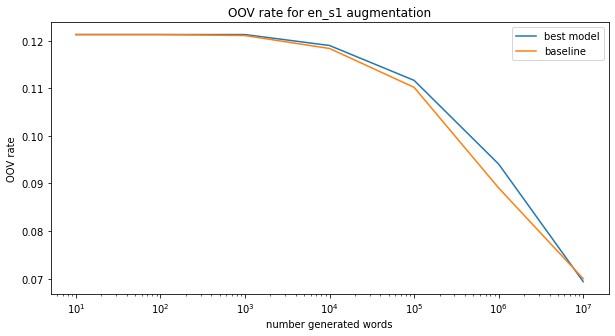

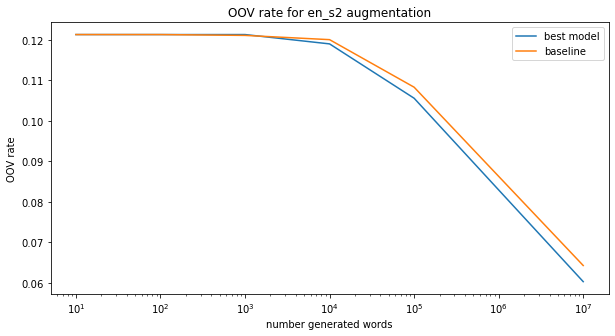

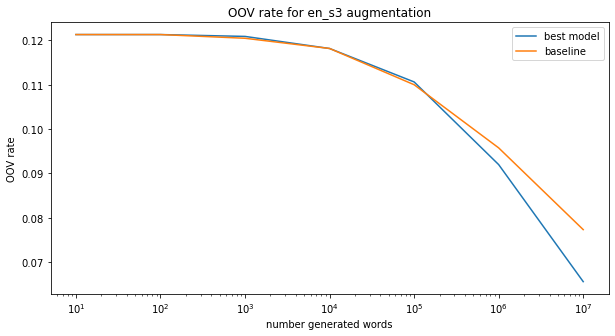

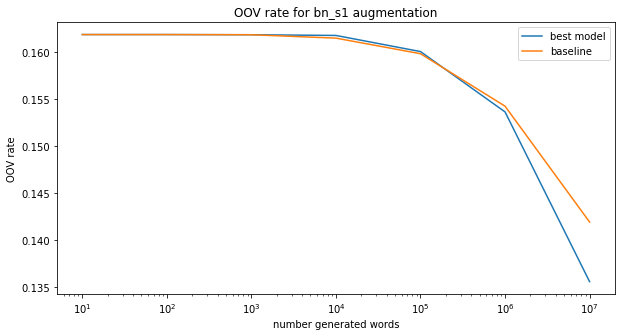

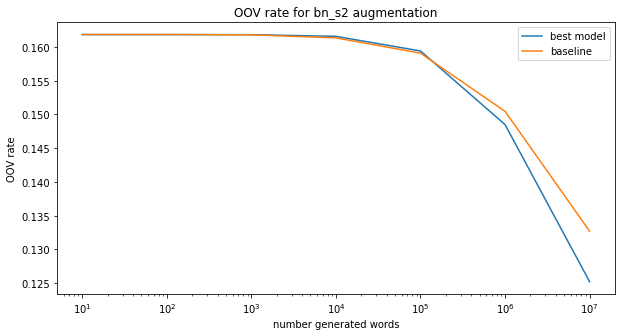

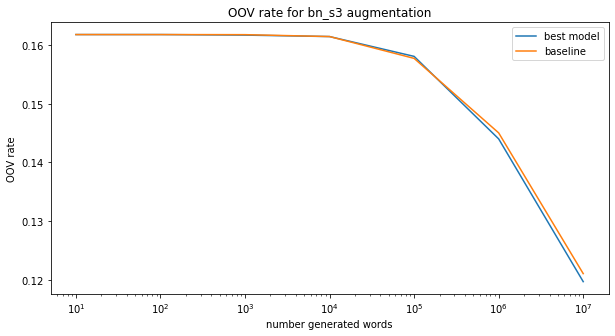

In [150]:
# You need to scroll in the below cell to see all plots!

plot_oov_rate('en_chars.model', 'en_s1')
plot_oov_rate('en_smaller.model', 'en_s2')
plot_oov_rate('en_larger.model', 'en_s3')
plot_oov_rate('bn_chars.model', 'bn_s1')
plot_oov_rate('bn_smaller.model', 'bn_s2')
plot_oov_rate('bn_larger.model', 'bn_s3')

# Exercise 6 - Summary and Analysis

First of all, we chose the following preprocessing steps which we applied to the given corpora. To treat words the same independent of whether they appear lowercased or uppercased, we transformed every word to its lower case. We removed additional, leading and trailing whitespaces for consistency and removed the punctuation after determining the sentences. This was done because we don't want punctuation in our generated tokens later, as punctuation will be present in the test file anyway. The same reason is valid for removing stopwords, which are commonly used and therefore are most probably already contained in the test file. Note that we decided to split the corpus into train and test according to the number of symbols contained. This means that we add as many sentences into the test set, until there are more than 20 % of the total symbols contained in there, then we stop.

The subwords generated by SentencePiece were inspected and we decided, that a vocabulary size of 250 and 1500 for the second and third model were approriate, as increasing beyond 250 produced too many word like tokens and increasing beyond 1500 produced almost only the original words as tokens. On the other hand, below 250 we noticed too many character-like tokens and tokens like _would or _could were split up although we think it is a good decision to keep them as atoms. The same happened for going below 1500, we wanted to stay near a word-like splitting but it resulted in more words being split up in two or three subwords. As we can't interpret the meaning of the bengali subwords, we inspected them just syntactically and found that the same values also provided a suitable granularity to build upon.

The perplexity of the baseline models and the best model with their hyperparameter configuration can be found in the below table:

| model             | vocabulary size (chosen by us) | vocabulary size (computed by RNNLM) | hidden layers | BPTT | class size | perplexity | baseline perplexity |
|-------------------|--------------------------------|-------------------------------------|---------------|------|------------|------------|---------------------|
| en chars          | 33                             | 33                                  | 150           | 7    | 1          | 3.9        | 5.0                 |
| en small subwords | 250                            | 243                                 | 100           | 6    | 243        | 27.8       | 29.3                |
| en large subwords | 1500                           | 1349                                | 2             | 10   | 1          | 517        | 717.0               |
| bn chars          | 544                            | 544                                 | 100           | 10   | 1          | 6.13       | 7.6                 |
| bn small subwords | 250                            | 723                                 | 300           | 10   | 1          | 22.3       | 34.1                |
| bn large subwords | 1500                           | 1972                                | 300           | 10   | 1          | 160.6      | 184.7               |


We observed that usually changing the class size from the vocabulary size to 1 (i. e. deactivating the classification task) provided better results. We also observed that a BPTT paramter of 3 was inferior to one above 6. In most cases a value of 10 provided best perplexity scores. Furhtermore, we could see that increasing the hidden layer size drastically improved the results, although this impacted computation time immensely (especially with the larger bengali corpus), which resulted in long training times on our laptops.

When inspecting the generated 100.txt files, we can observe that the character based model has a mediocre quality of generated words. Some words are only partially generated, others are put together from characters but aren't syntactically correct. The same is true for the smaller subword model, although is does a better job at composing words. Tokens like _would or _much stay together, but were already in the train file, so no generation success can be seen here. If words are composed of multiple subwords, they are often correct (like _s om et hing or _j u m p ed) but some make no sense at all. The third model has the advantage that many tokens are already valid words, so many generated words are correct, but they were in the train file to begin with. Also, stem and ending are sometimes put togher, which makes the most sense grammatically, for example _dream ing, _fill ed or _eat ed (although this is a wrong grammatical form). As we don't understand bengali, we are not able to assess the generation success there. 

For all models, we can observe a similar reduction shape of the OOV-rate. Every model eventually improves over the baseline model, but for the english character level, this improvement can only be observed when adding 10.000.000 words to the vocabulary. Most of the times, the OOV-rate is very similar until we exceed the point of adding 100.000 words to the train set. Especially for the larger english model and the two smaller bengali models, we can see an eventual improvement by 0.05 to 0.1 against the baseline. For english, adding generated tokens to the train vocabulary almost halves the OOV-rate from 0.12 to 0.7 in all three cases.When doing the same for Bengali, the reduction is not quite as good, usually going from around 0.16 to 0.12 (or 0.13).

Probably, this difference is caused by the simple structure of the english language, which allows to put subwords together with a good chance of finding a new valid word. The bengali structure is more complex and therefore we need to add more words to achieve a comparable reduction.

For english, we would take the model with smaller subwords, as it reaches the lowest OOV-rate and improves over the baseline already at 10.000 added words. For bengali, we would choose the model with larger subwords, because it also reaches the best OOV-rate with only 0.12. 

As a takeway, we can say that we discovered this approach to reduce OOV-rate, and we saw, that more complex languages don't profit as much as simple languages like english. This is also what we expected, so our believes were verified by the project. 

In further experiments, we would have looked at how much we could improve our results by changing the RNNML model parameters more (i.e. more hidden layers) which was limited by our hardware. Also running multiple RNNML models with different initializations and interpolating over the probabilities in an ensemble-like fashion could have improved the results further. Because training was so time-intensive, we only varied the vocabulary size slightly without finding much improvements, so this would also be a starting point for further investigation.